In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

np.random.seed(42)

# Synthetic data
X_synthetic = np.linspace(0, 10, 50).reshape(-1, 1)         # (50,1)
noise       = np.random.normal(0, 1, (50, 1))               # (50,1)
y_synthetic = (2 * X_synthetic + 1 + noise).flatten()      # now (50,)

# Normalize feature
scaler = StandardScaler()
X_synthetic_normalized = scaler.fit_transform(X_synthetic)

print("Synthetic Design Matrix (first 5 rows):\n", X_synthetic_normalized[:5])

# Answer: How does normalization affect the feature values?
# Normalization transforms the feature values to have zero mean and unit variance. This helps gradient descent converge faster and avoids one feature dominating others due to scale.

Synthetic Design Matrix (first 5 rows):
 [[-1.69774938]
 [-1.62845348]
 [-1.55915759]
 [-1.4898617 ]
 [-1.4205658 ]]


In [11]:
# Linear model
def predict(X, w, b):
    return w * X + b

# Mean Squared Error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Mean Absolute Error
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))


In [12]:
params = [(1.5, 0.5), (2.0, 1.0), (2.5, 0.0)]

for w, b in params:
    y_pred = predict(X_synthetic_normalized, w, b)
    mse = mean_squared_error(y_synthetic, y_pred)
    mae = mean_absolute_error(y_synthetic, y_pred)
    print(f"w = {w}, b = {b} → MSE: {mse:.3f}, MAE: {mae:.3f}")


#Answer: Why does MSE penalize larger errors more than MAE?
#MSE squares the error values, so larger errors are amplified more. MAE treats all errors linearly, so it is less sensitive to outliers.

w = 1.5, b = 0.5 → MSE: 141.352, MAE: 10.301
w = 2.0, b = 1.0 → MSE: 133.078, MAE: 9.864
w = 2.5, b = 0.0 → MSE: 155.877, MAE: 10.838


In [15]:
# Gradient Descent for Linear Regression
def gradient_descent(X, y, lr=0.01, iterations=100):
    w = 0
    b = 0
    m = len(y)
    mse_history = []

    for i in range(iterations):
        y_pred = w * X + b
        dw = (2/m) * np.sum((y_pred - y) * X)
        db = (2/m) * np.sum(y_pred - y)

        w -= lr * dw
        b -= lr * db

        mse = mean_squared_error(y, y_pred)
        mse_history.append(mse)

    return w, b, mse_history


# Train model
w_opt, b_opt, history = gradient_descent(
    X_synthetic_normalized.flatten(), 
    y_synthetic
)
print(f"Optimized w: {w_opt:.4f}, b: {b_opt:.4f}")

Optimized w: 4.9609, b: 9.3456


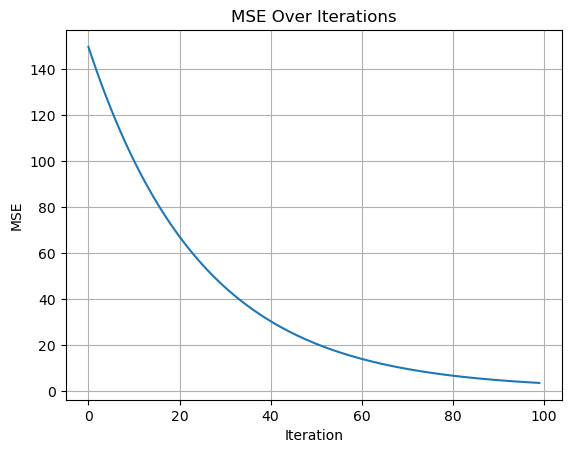

In [16]:
plt.plot(history)
plt.title("MSE Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()
# Answer: How does the learning rate affect convergence?
# A learning rate that's too small leads to slow convergence; too large can cause overshooting and divergence. Tuning is essential.

In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load data
data = fetch_california_housing()
X_real = data.data[:, [0, 1]]  # e.g., MedInc and HouseAge
y_real = data.target

# Normalize features
X_real = StandardScaler().fit_transform(X_real)

# Use just one feature for simplicity (MedInc)
X_real_single = X_real[:, 0].reshape(-1, 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_real_single, y_real, test_size=0.2, random_state=42)

# Flatten for gradient descent
w_real, b_real, _ = gradient_descent(X_train.flatten(), y_train)

# Evaluate
y_pred_test = predict(X_test, w_real, b_real)
mse_real = mean_squared_error(y_test, y_pred_test)
mae_real = mean_absolute_error(y_test, y_pred_test)

print(f"Real Data → Test MSE: {mse_real:.3f}, MAE: {mae_real:.3f}")


Real Data → Test MSE: 1.860, MAE: 1.025


Real Data → Test MSE: 1.860, MAE: 1.025
